In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime
import numpy as np

In [2]:
# Define which online source one should use
data_source = 'yahoo'
start_date = '2010-01-01'
end_date = '2011-12-31'

In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft
tickers_IND1 = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT','DIS']

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data_IND1 = data.DataReader(tickers_IND1, data_source, start_date, end_date)

In [4]:
#tickers_IND2 = ['BAC','GE','AMD','MU','INTC','AAPL','ORCL','MSFT','CHK','T','CTL','CMCSA','F','FOXA','FCX','CSCO','C','MRO','FB','AES','HBAN','WFC','PFE','AMAT','JPM','CVS','NVDA','GM','RF','WMT','VZ','DIS','KEY','CSX','MRK','HPE','M','KMI','HPQ','SLB']

#panel_data_IND2= data.DataReader(tickers_IND2, data_source, start_date, end_date)

In [5]:
print panel_data_IND1
#print panel_data_IND2

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 505 (major_axis) x 30 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2011-12-30 00:00:00 to 2009-12-31 00:00:00
Minor_axis axis: AAPL to XOM


In [6]:
def fconv(panel_data):
    del panel_data['Open']
    del panel_data['Close']
    del panel_data['High']
    del panel_data['Low']

    panel_data = panel_data[:,::-1,:]
fconv(panel_data_IND1)
#fconv(panel_data_IND2)

In [7]:
numberOfDays = len(panel_data_IND1.axes[1]) -1 
print "days: " + str(numberOfDays)
n_IND1 = len(tickers_IND1)
print "companies in dow30: " + str(n_IND1)
#n_IND2 = len(tickers_IND2)
#print "companies in dow30: " + str(n_IND2)

days: 504
companies in dow30: 30


In [8]:
c=0
l=[]
for i in range(2):
    for j in range(numberOfDays + 1):
        for k in range(len(tickers_IND1)):
            
            if (math.isnan(panel_data_IND1[i,j,k])):
                if(l.count(tickers_IND1[k]) == 0):
                    l.append(tickers_IND1[k])
                c+=1
print c, l

0 []


In [9]:
def flogprof(panel_data, numberOfDays, n):
    logProf = [[round(math.log(panel_data[0,i,j] / panel_data[0,i-1,j]), 4) for i in range(1,numberOfDays + 1)] for j in range(n)] 
    return logProf
    
logProf_IND1 = flogprof(panel_data=panel_data_IND1, numberOfDays=numberOfDays,n=n_IND1)
#logProf_IND2 = flogprof(panel_data=panel_data_IND2, numberOfDays=numberOfDays,n=n_IND2)

In [28]:
print len(logProf_IND1)
print len(logProf_IND1[0])

30
504


In [34]:
a = np.array(logProf_IND1)
logprofT = a.transpose() 
print len(logprofT)
print len(logprofT[0])

504
30


In [42]:
import scipy
from scipy.optimize import minimize, rosen, rosen_der

In [86]:
def ind(matrix, X):
    Y = []
    for day in matrix:
        sum = 0
        for i,elem in enumerate(day):
            sum += elem*X[i]
        Y.append(sum)
    return Y

In [87]:
def R(X, matrix):
    Y = ind(matrix, X)
    r = 0
    for i,day in enumerate(matrix):
        for elem in day:
            r += (elem - Y[i])**2
    return r

In [88]:
# решение задачи минимизации риска при заданнной доходности
def minR(matrix):
    X0 = np.zeros(len(matrix[0]))
    res = scipy.optimize.minimize(fun=R, x0=X0, args=matrix)
    return res

In [89]:
result =minR(logprofT)

In [90]:
X = result.x
print X

[ 0.03333499  0.03333311  0.03333417  0.03333511  0.03333283  0.03333012
  0.03333402  0.03333241  0.03333139  0.03333245  0.03333458  0.03333326
  0.03333431  0.03333524  0.03333456  0.03333205  0.03333068  0.03333264
  0.03333608  0.03333399  0.0333326   0.03333068  0.03333407  0.0333338
  0.03333348  0.03333132  0.03333308  0.03333363  0.03333227  0.03333696]


In [91]:
Y = ind(logprofT, X)
print len(Y)

504


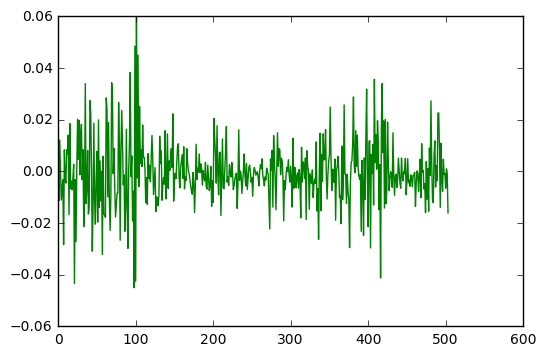

In [92]:
plt.plot(range(numberOfDays), Y, '-g')
plt.show()